<a href="https://colab.research.google.com/github/urvashiramdasani/Covid-19-Detection/blob/master/ML_Innovative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COVID-19 Detection**

This project is maintained as a part of 2CS501: Machine Learning Innovative Assignment by 4 students.
1. Shreyanshi Vadhvana (18BCE225)
2. Shruti Kapadia (18BCE226)
3. Sunidhi Tandel (18BCE239)
4. Urvashi Ramdasani (18BCE247)

This project predicts whether a person is suffering from COVID-19 or not by analyzing their Chest X-Ray images. It implements Convolutional Neural Networks (CNNs) for classification. The Dataset has been taken from Kaggle (https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset). The project has various sections such as Mounting Drive, Using Kaggle, Data Loading and Preprocessing and Convolutional Neural Networks. 

A Convolutionary Neural Network (ConvNet/CNN) is a deep learning algorithm that can take an input image, assign importance to various aspects/objects in the image (learnable weights and biases) and be able to distinguish one from the other. Compared to other classification algorithms, the pre-processing needed for a CNN is much lower. Although filters are hand-engineered in primitive processes, CNN has the ability to learn these filters/characteristics with adequate preparation.

The primary reason behind using CNN is that no feature engineering is required before we had to spend too much time on feature selection. When we compare handcrafted features with CNN, the output of CNN is good and it provides better precision. Local and global features are covered. It also learns various characteristics from pictures.



## Mounting Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Using Kaggle

Follow the stpes below to download dataset from Kaggle directly. 
1. Navigate to your kaggle account (Kaggle account required) and then to accounts. Click on Create API token button to generate a username and a key. A kaggle.json file would be downloaded.

2. Upload this file in a folder (named Kaggle) in Google Drive.

3. Mount your Google Drive to that folder. Now execute the below commands to download it in your runtime. 

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [ ]:
# Dowloading Dataset

!cd /content/drive/My Drive/Kaggle
!kaggle datasets download -d praveengovi/coronahack-chest-xraydataset
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0446-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0447-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0448-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0449-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0450-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0451-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0452-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0453-0001-0002.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0453-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack

In [ ]:
!ls

Chest_xray_Corona_dataset_Summary.csv  drive
Chest_xray_Corona_Metadata.csv	       sample_data
Coronahack-Chest-XRay-Dataset


## Loading libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

## Load Data

In [ ]:
meta_data = pd.read_csv("Chest_xray_Corona_Metadata.csv")
meta_data.sample(10)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
1191,1191,NORMAL2-IM-1197-0001.jpeg,Normal,TRAIN,NaN,NaN
3647,3647,person458_bacteria_1951.jpeg,Pnemonia,TRAIN,NaN,bacteria
4452,4452,person526_bacteria_2221.jpeg,Pnemonia,TRAIN,NaN,bacteria
1402,1402,person1147_virus_1917.jpeg,Pnemonia,TRAIN,NaN,Virus
1788,1788,person1186_virus_2021.jpeg,Pnemonia,TRAIN,NaN,Virus
5854,5877,person175_bacteria_835.jpeg,Pnemonia,TEST,NaN,bacteria
1350,1350,person1016_bacteria_2947.jpeg,Pnemonia,TRAIN,NaN,bacteria
569,569,IM-0713-0001.jpeg,Normal,TRAIN,NaN,NaN
3989,3989,person500_bacteria_2106.jpeg,Pnemonia,TRAIN,NaN,bacteria
4614,4614,person647_virus_1228.jpeg,Pnemonia,TRAIN,NaN,Virus


## Data Preprocessing

In [ ]:
TEST_FOLDER = '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'
TRAIN_FOLDER = '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'

In [ ]:
train_data = meta_data[meta_data['Dataset_type'] == 'TRAIN']
test_data = meta_data[meta_data['Dataset_type'] == 'TEST']

print(f"Shape of training dataset: {train_data.shape}")
print(f"Shape of testing dataset: {test_data.shape}")

Shape of training dataset: (5286, 6)
Shape of testing dataset: (624, 6)


In [ ]:
from sklearn.utils import shuffle 
train_data = shuffle(train_data, random_state = 42)

final_validation_data = train_data.iloc[:228, :]
final_train_data = train_data.iloc[228:, :]

print('Validation Data shape : ', final_validation_data.shape)
print('Train Data shape : ', final_train_data.shape)

Validation Data shape :  (228, 6)
Train Data shape :  (5058, 6)


## Defining Model

In [ ]:
#Training model

#Creating a sequential model
model = Sequential()

#Using the add method to add a layer on top of the layer stack
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
#Getting parameters

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 128)     36992     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 128)     0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 64)      73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 64)       

In [ ]:
#Moulding train images

train_datagen = image.ImageDataGenerator(rescale = 1./255, 
                                         shear_range = 0.2,
                                         zoom_range = 0.2, 
                                         horizontal_flip = True,
                                        )

test_datagen = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=final_train_data,
    directory=TRAIN_FOLDER,
    x_col='X_ray_image_name',
    y_col='Label',
    target_size=(224, 224),
    batch_size=8,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)


validation_generator = train_datagen.flow_from_dataframe(
    dataframe=final_validation_data,
    directory=TRAIN_FOLDER,
    x_col='X_ray_image_name',
    y_col='Label',
    target_size=(224, 224),
    batch_size=8,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    directory=TEST_FOLDER,
    x_col='X_ray_image_name',
    target_size=(224, 224),
    shuffle=False,
    batch_size=16,
    class_mode=None
)

Found 5058 validated image filenames belonging to 2 classes.
Found 228 validated image filenames belonging to 2 classes.
Found 624 validated image filenames.


## Training Model

In [ ]:
#Training the model

hist_new = model.fit(
    train_generator,
    steps_per_epoch= 32,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/100
32/32 [==============================] - 114s 4s/step - loss: 0.6634 - accuracy: 0.6992 - val_loss: 0.6646 - val_accuracy: 0.6250
Epoch 2/100
32/32 [==============================] - 114s 4s/step - loss: 0.5515 - accuracy: 0.7734 - val_loss: 0.4498 - val_accuracy: 0.8125
Epoch 3/100
32/32 [==============================] - 113s 4s/step - loss: 0.5719 - accuracy: 0.7266 - val_loss: 0.5146 - val_accuracy: 0.6875
Epoch 4/100
32/32 [==============================] - 113s 4s/step - loss: 0.5437 - accuracy: 0.7031 - val_loss: 0.3143 - val_accuracy: 0.8750
Epoch 5/100
32/32 [==============================] - 116s 4s/step - loss: 0.4895 - accuracy: 0.7734 - val_loss: 0.5525 - val_accuracy: 0.8125
Epoch 6/100
32/32 [==============================] - 113s 4s/step - loss: 0.5528 - accuracy: 0.7578 - val_loss: 0.4416 - val_accuracy: 0.9375
Epoch 7/100
32/32 [==============================] - 114s 4s/step - loss: 0.4213 - accuracy: 0.7930 - val_loss: 0.4776 - val_accuracy: 0.7500
Epoch 

In [ ]:
model.evaluate_generator(train_generator)

[0.1544235646724701, 0.9412811398506165]

## Saving Model

In [ ]:
import tensorflow as tf

tf.keras.models.save_model(model, 'model_100.h5')
loaded_model = tf.keras.models.load_model('model_100.h5')

In [ ]:
import pickle

file = open('history_100.pkl', 'wb')
pickle.dump(hist_new.history, file)
file.close()

In [ ]:
file = open('history_100.pkl', 'rb')
history = pickle.load(file)
file.close()
print(history['accuracy'])

[0.69921875, 0.7734375, 0.7265625, 0.703125, 0.7734375, 0.7578125, 0.79296875, 0.88671875, 0.8125, 0.84765625, 0.87890625, 0.8359375, 0.890625, 0.84765625, 0.8671875, 0.875, 0.84765625, 0.90625, 0.92578125, 0.87890625, 0.8671875, 0.90625, 0.875, 0.890625, 0.90234375, 0.921875, 0.90234375, 0.91796875, 0.8999999761581421, 0.8515625, 0.8515625, 0.921875, 0.890625, 0.90234375, 0.87109375, 0.921875, 0.8984375, 0.8828125, 0.91796875, 0.88671875, 0.8984375, 0.91796875, 0.9120000004768372, 0.94140625, 0.9319999814033508, 0.85546875, 0.9240000247955322, 0.921875, 0.921875, 0.9140625, 0.91015625, 0.9296875, 0.890625, 0.88671875, 0.921875, 0.94921875, 0.89453125, 0.91015625, 0.921875, 0.9140625, 0.890625, 0.921875, 0.8984375, 0.9140625, 0.87109375, 0.921875, 0.890625, 0.9453125, 0.89453125, 0.9296875, 0.90625, 0.89453125, 0.92578125, 0.8828125, 0.9375, 0.90234375, 0.8960000276565552, 0.92578125, 0.9296875, 0.921875, 0.90625, 0.9140625, 0.9140625, 0.91015625, 0.9140625, 0.92578125, 0.93359375, 0.9

## Evaluating Model

In [ ]:
probabilities = loaded_model.predict_generator(test_generator)

Accuracy :  0.8509615384615384
F1-score :  0.8899408284023669
Precision-score :  0.9641025641025641
Recall-score :  0.8263736263736263


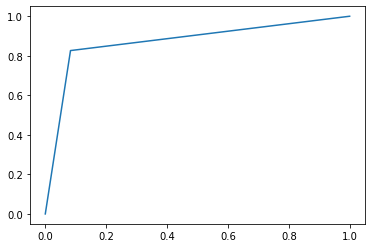

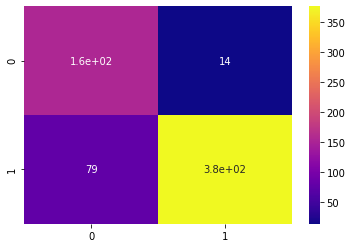

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve
import seaborn as sns

y_pred = probabilities > 0.5

y_test = []
for i in range(5286, 5910):
    if test_data['Label'][i] == 'Normal':
        y_test.append(0)
    else:
        y_test.append(1)

accuracy = accuracy_score(y_pred, y_test)
f_score = f1_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)

print("Accuracy : ", accuracy)
print("F1-score : ", f_score)
print("Precision-score : ", precision)
print("Recall-score : ", recall)
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
plt.plot(fpr, tpr)
plt.savefig('roc_curve_100.pdf')
plt.show()

cn = confusion_matrix(y_pred, y_test)
sns_plot = sns.heatmap(cn, cmap="plasma", annot = True) #1: Pneumonia ; 0: Normal
sns_plot.figure.savefig('confusion_matrix_100.pdf')

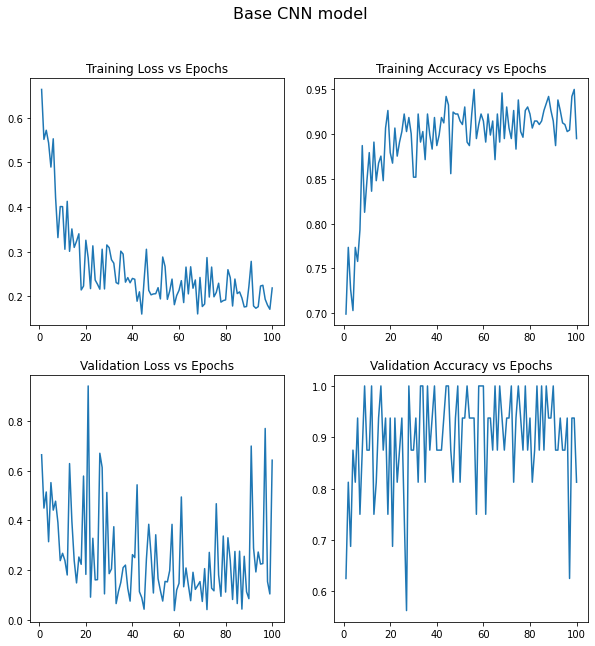

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 101), y=hist_new.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 101), y=hist_new.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 101), y=hist_new.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 101), y=hist_new.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training Accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation Accuracy vs Epochs')
fig.suptitle('Base CNN model', size=16)
plt.savefig('Base-CNN-model_100.pdf')
plt.show()